# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.columns
df.dtypes

temperature    float64
gender          object
heart_rate     float64
dtype: object

In [19]:
from matplotlib import pyplot
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
import numpy as np

<b> 1. Checking for normality of data </b>

(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

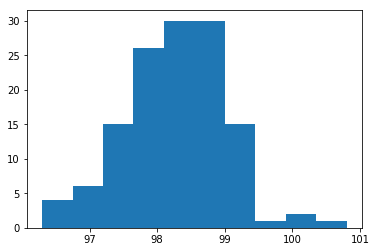

In [4]:
pyplot.hist(df.temperature)

In [5]:
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.987, p=0.233


In [6]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian ')
else:
    print('Sample does not look Gaussian')

Sample looks Gaussian 


It looks like the tempratures are normally distributed

<b> 2. - Is the sample size large? Are the observations independent? </b>

In [7]:
len(df.temperature)

130

There are a 130 observations. This is a large enough observation. Additionally, it seems the samples have been taken from different people. Hence, the observations are independent.

    
<b>3. - Is the true population mean really 98.6 degrees F?
      - First, try a bootstrap hypothesis test.
      - Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
      - In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
      - Now try using the other test. How is the result be different? Why?</b>
    

Mean of temperatures: 98.24923076923075


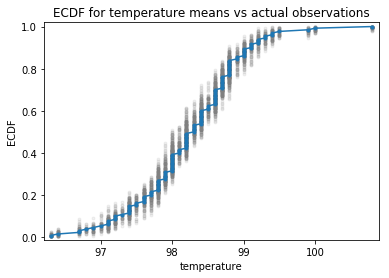

Bootstrap replicates (mean) for temperature: 98.24865715384615
Second Bootstrap replicates (mean) for temperature: 98.24855853846155
We get different means for different random samples.


In [8]:
#function -  ecdf: helper method to chart ECDF graphs
def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
#function : bootstrap
def bootstrp_replicate(data,func):
    bs_sample = np.random.choice(data,len(data))
    return func(bs_sample)

print('Mean of temperatures:',df.temperature.mean())
bs_mean = []
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df.temperature, size=len(df.temperature))
    #print(np.mean(bs_sample))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

x, y = ecdf(df.temperature)
_ = plt.plot(x, y, marker='.')

plt.margins(0.02)
_ = plt.xlabel('temperature')
_ = plt.ylabel('ECDF')
_=plt.title('ECDF for temperature means vs actual observations')    
plt.show()


bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrp_replicate(df.temperature, np.mean)

print("Bootstrap replicates (mean) for temperature:",bs_replicates.mean())

bs_replicates_2 = np.empty(10000)
for i in range(10000):
    bs_replicates_2[i] = bootstrp_replicate(df.temperature, np.mean)
    
print("Second Bootstrap replicates (mean) for temperature:",bs_replicates_2.mean())
print('We get different means for different random samples.')


The mean is not really 98.6

Now to identify if the means from different random samples are very different from each other or not.

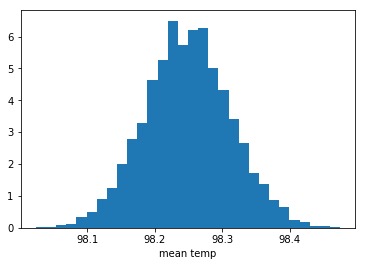

Visually, the two histograms are not very different from each other.


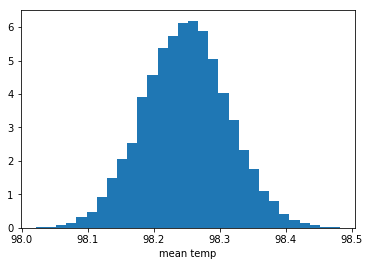

In [11]:
_ = plt.hist(bs_replicates, bins = 30, normed = True)
_ = plt.xlabel('mean temp')
plt.show()

print('Visually, the two histograms are not very different from each other.')

_ = plt.hist(bs_replicates_2, bins = 30, normed = True)
_ = plt.xlabel('mean temp')
plt.show()

The mean is not really 98.6. The mean is actually close to 98.24.
The t-test is a small number so the difference is not significant.

It is appropriate to use the Z-statistic becuse the sample size is greater than 30. If the calculated p_value is <0.05, the null hypothesis will be rejected. 

The null hypothesis here is that the population mean is 98.6.

In [14]:
# Replicates which are equal to 98.6
p = np.sum(bs_replicates == 98.6) / 10000
print('p-value=', p)


p-value= 0.0


Since the p-value is 0.0, we can reject the null hypothesis that the population mean is 98.6.

#### One sample t-test

In [18]:
t, p = ttest_1samp(df['temperature'], popmean=98.6)
print('t-value:',t)
print('p-value:',p)

t-value: -5.4548232923645195
p-value: 2.4106320415561276e-07


The p-value is small enough to reject the null hypothesis.

#### One sample z-test

In [20]:
tz, pz = ztest(x1=df['temperature'], value=98.6)
print('p-value:',pz)

p-value: 4.9021570141012155e-08


The p-value is small enough to reject the null hypothesis.

  <b>4. -  Draw a small sample of size 10 from the data and repeat both frequentist tests.
     - Which one is the correct one to use?
     - What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?
  </b>

In [35]:
# Draw a small sample of size 10 from the data
tenSamples = np.random.choice(df['temperature'], size=10)
ttest_t, ttest_p = ttest_1samp(tenSamples, popmean=98.6)
ztest_t, ztest_p = ztest(tenSamples, value=98.6)
print('p-value for t-test sample size 10: ', ttest_p)
print('p-value for z-test sample size 10: ', ztest_p)
print('---------------------------------------------')

#repeating test multiple times
for i in range(10):
    tenSamples = np.random.choice(df['temperature'], size=10)
    ttest_t, ttest_p = ttest_1samp(tenSamples, popmean=98.6)
    ztest_t, ztest_p = ztest(tenSamples, value=98.6)
    print('p-value for t-test sample size 10: ', ttest_p)
    print('p-value for z-test sample size 10: ', ztest_p)
    print('---------------------------------------------')

p-value for t-test sample size 10:  0.2992803010941588
p-value for z-test sample size 10:  0.27069660247003524
---------------------------------------------
p-value for t-test sample size 10:  0.9999999999999075
p-value for z-test sample size 10:  0.999999999999905
---------------------------------------------
p-value for t-test sample size 10:  0.14144752532740956
p-value for z-test sample size 10:  0.10698837307949317
---------------------------------------------
p-value for t-test sample size 10:  0.03893150105008489
p-value for z-test sample size 10:  0.01573722226631349
---------------------------------------------
p-value for t-test sample size 10:  0.8995099605151111
p-value for z-test sample size 10:  0.8966532337560169
---------------------------------------------
p-value for t-test sample size 10:  0.02239724923949273
p-value for z-test sample size 10:  0.005920218125322062
---------------------------------------------
p-value for t-test sample size 10:  0.09565838959999741
p

Since the sample size is less than 30, the p-value obtained from the t-test should be considered. Repeated tests show that the p-value obtained by the z-test for such a sample size is less than that of the t-test.

For the larger sample size, using the z-test makes more sense as it produces a lower p-value.

<b>5. - At what temperature should we consider someone's temperature to be "abnormal"?
       - As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
       - Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that    you should use the </b>

In [38]:
#Abnormal temperatures
conf_int = np.percentile(bs_replicates, [2.5,97.5])
print('confidence interval 2.5% to 97.5%:',conf_int)
print('Margin of Error',1.96*bs_replicates.std())

confidence interval 2.5% to 97.5%: [98.12307692 98.37538462]
margin of error 0.12497185081830203


Temperatures above 98.4 and below 98.1 will be considered abnormal, with a margin of error of 0.1 degrees

In [42]:
# Compute the 95% Confidence Interval, Frequentist Approach
std = df['temperature'].std() / np.sqrt(len(df['temperature']))

# Compute Margin of Error, Frequentist Approach
margin_of_error = 1.96 * std # Assuming 95% Confidence
conf_interval_up =  np.mean(df['temperature']) + margin_of_error
conf_interval_down = np.mean(df['temperature']) - margin_of_error
print('confidence interval 2.5% to 97.5%:',conf_interval_up, ' to ', conf_interval_down)
print('Margin of Error',margin_of_error)

confidence interval 2.5% to 97.5%: 98.37526742623301  to  98.12319411222849
Margin of Error 0.1260366570022664


Temperatures above 98.4 and below 98.1 will be considered abnormal, with a margin of error of 0.1 degrees

<b>6. - Is there a significant difference between males and females in normal temperature?
   - What testing approach did you use and why?
   - Write a story with your conclusion in the context of the original problem.


65


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


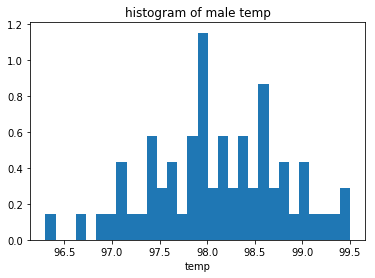

65


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


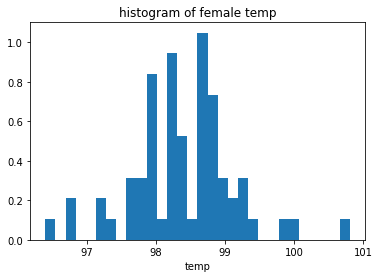

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


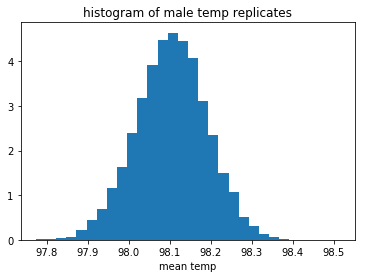

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


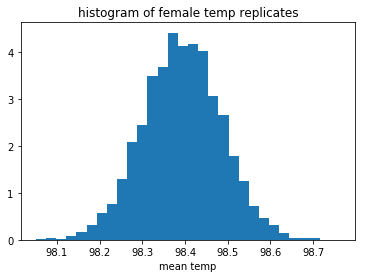

In [45]:
#extracting male and female body temperatures
male_temp = df[df['gender']== 'M']['temperature']
print(len(male_temp))

_ = plt.hist(male_temp, bins = 30, normed = True)
_ = plt.xlabel('temp')
_ = plt.title('histogram of male temp')
plt.show()

bs_replicates_M= np.empty(10000)
for i in range(10000):
    bs_replicates_M[i] = bootstrp_replicate(male_temp, np.mean)

female_temp = df[df['gender']== 'F']['temperature']
print(len(female_temp))

_ = plt.hist(female_temp, bins = 30, normed = True)
_ = plt.xlabel('temp')
_ = plt.title('histogram of female temp')
plt.show()

bs_replicates_F= np.empty(10000)
for i in range(10000):
    bs_replicates_F[i] = bootstrp_replicate(female_temp, np.mean)
    
#histogram of male temp replicates
_ = plt.hist(bs_replicates_M, bins = 30, normed = True)
_ = plt.xlabel('mean temp')
_ = plt.title('histogram of male temp replicates')
plt.show()

#histogram of female temp replicates
_ = plt.hist(bs_replicates_F, bins = 30, normed = True)
_ = plt.xlabel('mean temp')
_ = plt.title('histogram of female temp replicates')
plt.show()


As we can notice from the histograms, there is a difference in the distribution of temperatures between males and females.
We explore it further below.

In [49]:
#two sample ttest
t4, p4 = stats.ttest_ind(bs_replicates_M,bs_replicates_F)
print('t score = ', t4)
print('p-score = ', p4)



t score =  -230.96331373831632
p-score =  0.0
t score =  -2.2854345381656103
p-score =  0.02393188312239561


The p-score is 0.0 for the replicates which is sufficient to conclude that the male and female temperature means are not the same.

In [46]:
#two sample ttest on temperatures
t5, p5 = stats.ttest_ind(male_temp,female_temp)

print('t score = ', t5)
print('p-score = ', p5)

t score =  -2.2854345381656103
p-score =  0.02393188312239561


The p-score is 0.02 (<0.05) for the actual values which is sufficient to conclude that the male and female temperature means are not the same.

It appears that the data used initially may have been skewed towards one gender which may have resulted in the mean to come out as 98.6 where as it clearly shows here with this data set that the mean is different.

We are also ignoring other considerations like climate, precision of the equipment used, general health of the person, number of readings taken to come to one value etc. These factors may effect the mean calculations as well.